In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skimage
import skimage.filters as skif
print(skimage.__version__)

0.16.2


In [2]:
def DataToArray(path,filename,x0,x1,y0,y1):
    filepath=path+filename
    I=plt.imread(filepath)
    I=np.array(I,dtype=int)
    I=I[x0:x1,y0:y1]
    return I

In [100]:
path='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
x0=600
x1=1600
y0=500
y1=1600
signal='1A_0001.tif'
I=DataToArray(path,signal,x0,x1,y0,y1)
background='FONDO_EXP01_0001.tif'
If=DataToArray(path,background,x0,x1,y0,y1)
Isf=I-If

### Fondo

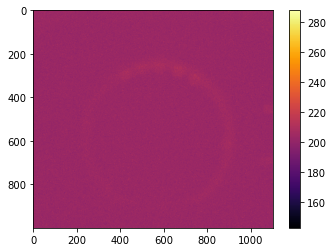

In [101]:
plt.figure()
plt.imshow(If,cmap='inferno')
plt.colorbar()

### Señal

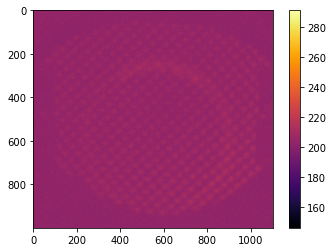

In [102]:
plt.figure()
plt.imshow(I,cmap='inferno')
plt.colorbar()

### Sin fondo

([], <a list of 0 Text major ticklabel objects>)

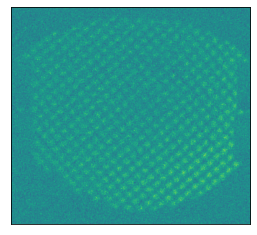

In [103]:
plt.figure()
I_filtered=skif.gaussian(Isf,1)
plt.imshow(I_filtered,cmap='viridis')
#plt.colorbar()
plt.xticks([])
plt.yticks([])


### Calculos

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

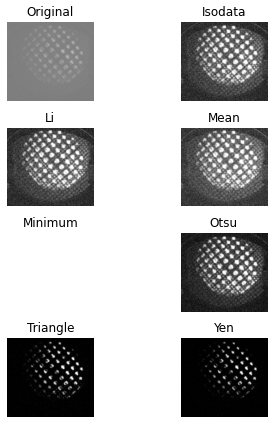

In [104]:
%matplotlib widget
path1='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
signal='7A_0001.tif'
I=DataToArray(path1,signal,x0,x1,y0,y1)
path2='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
background='FONDO_EXP01_0001.tif'
If=DataToArray(path2,background,x0,x1,y0,y1)
Isf=I-If
I_filtered=skif.try_all_threshold(Isf, figsize=(6, 6), verbose=False)
plt.show()
#plt.imshow(I_filtered,cmap='viridis')
#plt.colorbar()

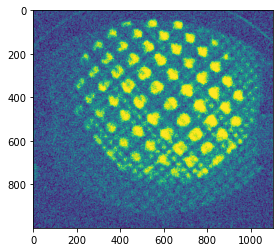

In [106]:
%matplotlib inline
path1='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
signal='7A_0001.tif'
I=DataToArray(path1,signal,x0,x1,y0,y1)
path2='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
background='FONDO_EXP01_0001.tif'
If=DataToArray(path2,background,x0,x1,y0,y1)
Isf=I-If
plt.figure()
thresh=skif.threshold_mean(Isf)
binary = Isf > thresh
I_filtered=skif.gaussian(binary,1)
#I_filtered=binary
plt.imshow(I_filtered,cmap='viridis')



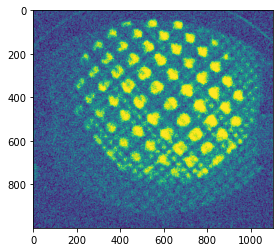

In [110]:
path1='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
background='FONDO_EXP01_0001.tif'
for i in range(1,8):
    signal='{}A_0001.tif'.format(i)
    I=DataToArray(path1,signal,x0,x1,y0,y1)
    If=DataToArray(path2,background,x0,x1,y0,y1)
    Isf=I-If
    thresh=skif.threshold_mean(Isf)
    binary = Isf > thresh
    I_filtered=skif.gaussian(binary,1)
    plt.imshow(I_filtered,cmap='viridis')
    plt.savefig('Pepp_{}A_2gas_100W.pdf'.format(i))